In [1]:
import pandas as pd
import matplotlib.pyplot as plt


# Load the TSV file
file_path = '/data1/shypula/prog_diversity/all_experiments/Open_Ended_Reevaluation_Cosine_Bootstrap_2024-07-18_00-57-36/driver_stats_2024-07-23_01-44-47.tsv'
data = pd.read_csv(file_path, sep='\t')

# Display the first few rows of the dataset to understand its structure
data.head()



,model,template,temperature,top_p,num_return_sequences,all_coherence,all_semantic_count,all_semantic_proportion,all_accuracy,coh_semantic_proportion_of_all,...,inacc_stripped_subtrees_5,inacc_stripped_subtrees_6,inacc_plain_subtrees_3_bootstrap,inacc_plain_subtrees_4_bootstrap,inacc_plain_subtrees_5_bootstrap,inacc_plain_subtrees_6_bootstrap,inacc_stripped_subtrees_3_bootstrap,inacc_stripped_subtrees_4_bootstrap,inacc_stripped_subtrees_5_bootstrap,inacc_stripped_subtrees_6_bootstrap
0,meta-llama/Meta-Llama-3-8B,default,1.0,1.0,100,1.38,3.10,3.10,NaN,1.29,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,meta-llama/Meta-Llama-3-70B,default,1.0,1.0,100,1.57,3.38,3.38,NaN,1.29,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,meta-llama/Meta-Llama-3-70B-Instruct,default,1.0,1.0,100,44.48,44.33,44.33,NaN,35.24,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,meta-llama/Meta-Llama-3-70B-Instruct,two_shot_cot,1.0,1.0,100,43.62,32.24,32.24,NaN,24.19,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,codellama/CodeLlama-7b-Instruct-hf,default,1.0,1.0,100,4.62,6.52,6.52,NaN,4.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
[a for a in data.columns if "all" in a ]

['all_coherence',
 'all_semantic_count',
 'all_semantic_proportion',
 'all_accuracy',
 'coh_semantic_proportion_of_all',
 'all_average_cosine_distance_programs',
 'all_average_cosine_distance_raw',
 'all_distinct_1',
 'all_distinct_2',
 'all_distinct_3',
 'all_distinct_4',
 'all_distinct_5',
 'all_distinct_6',
 'all_distinct_1_no_comments',
 'all_distinct_2_no_comments',
 'all_distinct_3_no_comments',
 'all_distinct_4_no_comments',
 'all_distinct_5_no_comments',
 'all_distinct_6_no_comments',
 'all_distinct_1_raw',
 'all_distinct_2_raw',
 'all_distinct_3_raw',
 'all_distinct_4_raw',
 'all_distinct_5_raw',
 'all_distinct_6_raw',
 'all_distinct_1_bootstrap',
 'all_distinct_2_bootstrap',
 'all_distinct_3_bootstrap',
 'all_distinct_4_bootstrap',
 'all_distinct_5_bootstrap',
 'all_distinct_6_bootstrap',
 'all_distinct_1_no_comments_bootstrap',
 'all_distinct_2_no_comments_bootstrap',
 'all_distinct_3_no_comments_bootstrap',
 'all_distinct_4_no_comments_bootstrap',
 'all_distinct_5_no_commen

In [4]:
[col for col in data.columns if "cosine" in col]

['all_average_cosine_distance_programs',
 'all_average_cosine_distance_raw',
 'coh_average_cosine_distance_programs',
 'coh_average_cosine_distance_raw',
 'syn_average_cosine_distance_programs',
 'syn_average_cosine_distance_raw',
 'err_average_cosine_distance_programs',
 'err_average_cosine_distance_raw',
 'acc_average_cosine_distance_programs',
 'acc_average_cosine_distance_raw',
 'inacc_average_cosine_distance_programs',
 'inacc_average_cosine_distance_raw']

In [5]:
subset_data = data[data["temperature"] == 1.0]
subset_data = subset_data[~subset_data["model"].str.contains("tatsu")]

# Custom sorting order for the "model" and "template" columns
model_order = [
    "codellama/CodeLlama-34b-hf",
    "codellama/CodeLlama-34b-Instruct-hf",
    "codellama/CodeLlama-70b-Python-hf",
    "codellama/CodeLlama-70b-Instruct-hf",
    "codellama/CodeLlama-7b-hf",
    "codellama/CodeLlama-7b-Instruct-hf",
    "meta-llama/Meta-Llama-3-70B",
    "meta-llama/Meta-Llama-3-70B-Instruct",
    "meta-llama/Meta-Llama-3-8B",
    "meta-llama/Meta-Llama-3-8B-Instruct"
]

template_order = ["default", "two_shot", "two_shot_cot"]

# Convert the "model" and "template" columns to categorical types with the custom orders
subset_data["model"] = pd.Categorical(subset_data["model"], categories=model_order, ordered=True)
subset_data["template"] = pd.Categorical(subset_data["template"], categories=template_order, ordered=True)




subset_data = subset_data.sort_values(by=["model", "template"])





subset_data = subset_data[["model", "template", "all_coherence",  "coh_semantic_proportion_of_all", "coh_semantic_proportion", "all_semantic_proportion", 
                           "all_average_cosine_distance_raw", 
                           "all_distinct_4_bootstrap", "all_plain_subtrees_4_bootstrap", "all_stripped_subtrees_4_bootstrap",
                           "coh_average_cosine_distance_raw",
                            "coh_distinct_4_bootstrap", "coh_plain_subtrees_4_bootstrap", "coh_stripped_subtrees_4_bootstrap"]]
                           



In [73]:
subset_data

,model,template,all_coherence,coh_semantic_proportion_of_all,coh_semantic_proportion,all_semantic_proportion,all_average_cosine_distance_raw,all_distinct_4_bootstrap,all_plain_subtrees_4_bootstrap,all_stripped_subtrees_4_bootstrap,coh_average_cosine_distance_raw,coh_distinct_4_bootstrap,coh_plain_subtrees_4_bootstrap,coh_stripped_subtrees_4_bootstrap
27,codellama/CodeLlama-34b-hf,default,2.48,2.10,80.71,4.48,10.20,82.26,92.76,82.09,6.60,68.82,78.65,70.28
5,codellama/CodeLlama-34b-hf,two_shot,15.14,14.38,93.86,18.81,7.95,70.23,89.51,79.23,8.19,74.09,85.62,76.31
28,codellama/CodeLlama-34b-hf,two_shot_cot,12.71,11.95,94.96,15.86,5.06,72.02,90.13,80.92,5.74,75.32,84.67,76.69
13,codellama/CodeLlama-34b-Instruct-hf,default,3.29,2.48,79.59,4.90,10.24,84.08,94.49,83.22,7.99,70.66,79.56,75.06
29,codellama/CodeLlama-34b-Instruct-hf,two_shot,19.81,17.38,86.40,22.05,8.20,72.65,89.04,81.15,8.03,75.03,85.03,77.88
30,codellama/CodeLlama-34b-Instruct-hf,two_shot_cot,18.38,16.43,91.44,21.14,5.70,74.21,88.87,80.40,5.61,76.26,86.07,78.01
6,codellama/CodeLlama-70b-Python-hf,default,1.62,1.52,92.59,3.86,9.96,82.34,94.22,83.66,6.42,65.73,77.84,68.05
7,codellama/CodeLlama-70b-Python-hf,two_shot,12.52,11.19,90.34,15.38,6.70,71.42,88.97,80.64,8.66,74.32,83.78,77.29
8,codellama/CodeLlama-70b-Python-hf,two_shot_cot,13.00,11.62,89.18,15.86,5.40,72.79,89.76,81.75,5.47,75.21,85.13,78.40
9,codellama/CodeLlama-70b-Instruct-hf,default,4.48,3.29,77.75,5.90,7.82,76.99,91.66,80.71,5.13,68.17,78.02,70.88


In [74]:
# subset_data.to_csv("/data1/shypula/prog_diversity/all_experiments/Open_Ended_Reevaluation_2024-07-05_00-53-22/driver_stats_merge_subset.tsv", sep="\t", index=False)
subset_data.to_csv("/data1/shypula/prog_diversity/all_experiments/Open_Ended_Reevaluation_Cosine_Bootstrap_2024-07-18_00-57-36/driver_stats_merge_subset_resorted.tsv", sep="\t", index=False)

In [16]:
data

,model,template,temperature,top_p,num_return_sequences,all_coherence,all_semantic_count,all_semantic_proportion,all_accuracy,coh_semantic_proportion_of_all,...,inacc_stripped_subtrees_5,inacc_stripped_subtrees_6,inacc_plain_subtrees_3_bootstrap,inacc_plain_subtrees_4_bootstrap,inacc_plain_subtrees_5_bootstrap,inacc_plain_subtrees_6_bootstrap,inacc_stripped_subtrees_3_bootstrap,inacc_stripped_subtrees_4_bootstrap,inacc_stripped_subtrees_5_bootstrap,inacc_stripped_subtrees_6_bootstrap
8,meta-llama/Meta-Llama-3-8B-Instruct,default,1.0,1.0,100,38.29,42.95,42.95,NaN,35.29,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,meta-llama/Meta-Llama-3-8B-Instruct,two_shot_cot,1.0,1.0,100,14.67,18.14,18.14,NaN,13.76,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20,meta-llama/Meta-Llama-3-8B-Instruct,default,0.4,1.0,100,60.48,46.00,46.00,NaN,39.14,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21,meta-llama/Meta-Llama-3-8B-Instruct,default,0.8,1.0,100,57.52,57.95,57.95,NaN,49.38,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22,meta-llama/Meta-Llama-3-8B-Instruct,default,1.2,1.0,100,9.14,11.86,11.86,NaN,8.67,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23,meta-llama/Meta-Llama-3-8B-Instruct,default,1.4,1.0,100,0.52,2.52,2.52,NaN,0.52,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24,meta-llama/Meta-Llama-3-8B-Instruct,default,1.6,1.0,100,0.05,2.05,2.05,NaN,0.05,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25,meta-llama/Meta-Llama-3-8B-Instruct,default,1.8,1.0,100,0.00,2.00,2.00,NaN,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26,meta-llama/Meta-Llama-3-8B-Instruct,default,2.0,1.0,100,0.00,2.00,2.00,NaN,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
31,meta-llama/Meta-Llama-3-8B-Instruct,default,0.7,1.0,100,57.24,54.95,54.95,NaN,47.10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


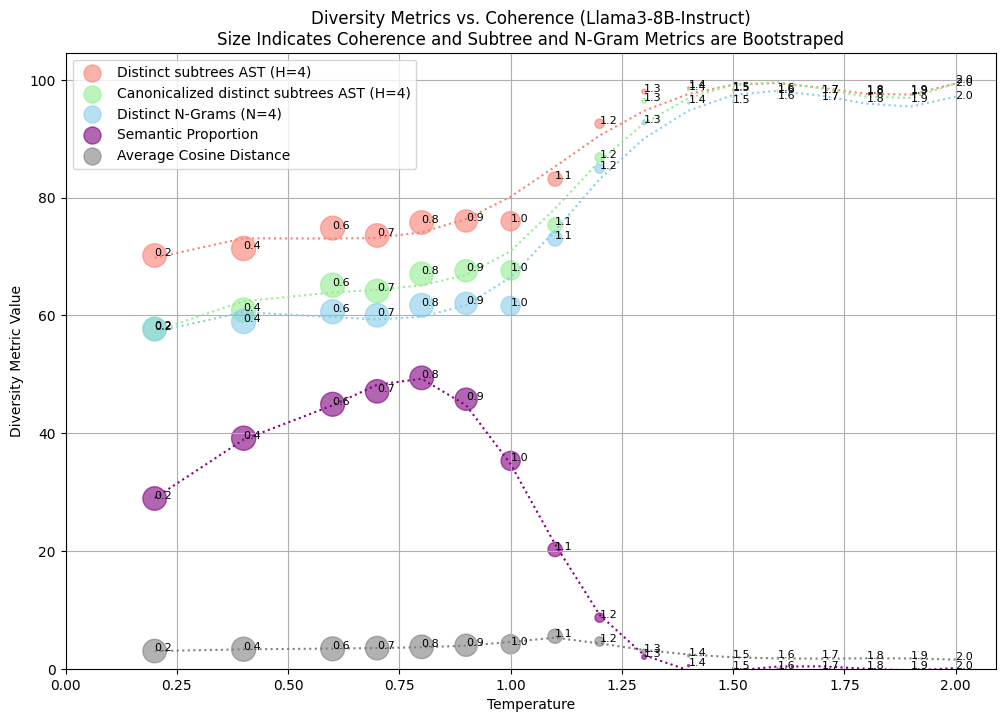

In [2]:
from scipy.stats import linregress
# spline 
from scipy.interpolate import make_interp_spline, BSpline, UnivariateSpline

# Calculate the normalized semantic count
file_path = '/data1/shypula/prog_diversity/all_experiments/Open_Ended_Reevaluation_Cosine_Bootstrap_2024-07-18_00-57-36/driver_stats_2024-07-23_01-44-47.tsv'
data = pd.read_csv(file_path, sep='\t')
data = data[data["template"]=="default"]
data = data[data["model"] == "meta-llama/Meta-Llama-3-8B-Instruct"]
# sort on temperature
data = data.sort_values(by=["temperature"])
# reindex 
data = data.reset_index(drop=True)

# normalize all cols 
# for col in ["all_distinct_4_bootstrap", "all_plain_subtrees_4_bootstrap", "all_stripped_subtrees_4_bootstrap", "all_average_cosine_distance_raw", "coh_semantic_proportion_of_all"]:
#     data[col] = (data[col] - data[col].min()) / (data[col].max() - data[col].min())
#     data[col] = data[col] * 100
data["all_average_cosine_distance_raw"] = data["all_average_cosine_distance_raw"] 
data["heuristic_cosine"] = data["coh_average_cosine_distance_raw"] * (data["all_coherence"] / 100) 
#normalize cosine between 0 and 1 
# data["all_average_cosine_distance_raw"] = (data["all_average_cosine_distance_raw"] - data["all_average_cosine_distance_raw"].min()) / (data["all_average_cosine_distance_raw"].max() - data["all_average_cosine_distance_raw"].min())
# data["all_average_cosine_distance_raw"] = data["all_average_cosine_distance_raw"] * 100
# data["heuristic_cosine"] = (data["heuristic_cosine"] - data["heuristic_cosine"].min()) / (data["heuristic_cosine"].max() - data["heuristic_cosine"].min())
# data["heuristic_cosine"] = data["heuristic_cosine"] * 100

    

bubble_size_coef = 5
s=50


# Prepare the scatter plot
plt.figure(figsize=(12, 8))

# Plot each diversity metric
# plt.scatter(data['coherence'], data['semantic_count_norm'], label='Semantic Count / 30', alpha=0.6)
# plt.scatter(data['coherence'], data['distinct_4'], label='Distinct 4', alpha=0.6)
# plt.scatter(data['coherence'], data['plain_subtrees_4'], label='Plain Subtrees 4', alpha=0.6)
# plt.scatter(data['coherence'], data['stripped_subtrees_4'], label='Stripped Subtrees 4', alpha=0.6)

# plt.scatter(data["semantic_count_norm"], data['coherence'], label='Semantic Count', alpha=0.6)

# ngram_color = 'blue'
# ast_color = 'red'
# # abstracted_ast_color = 'green'

# more pleasant colors
ngram_color = 'skyblue'
ast_color = 'salmon'
abstracted_ast_color = 'lightgreen'
cosine_color = 'gray'
semantic_color = 'purple'

# splines: temperature is X, metric is Y, coherence is dot size 

# ngram
# ngram_spline = make_interp_spline(data['temperature'], data['all_distinct_4_bootstrap'], k=k)
# ast_spline = make_interp_spline(data['temperature'], data['all_plain_subtrees_4_bootstrap'], k=k)
# abstracted_ast_spline = make_interp_spline(data['temperature'], data['all_stripped_subtrees_4_bootstrap'], k=k)
# cosine_spline = make_interp_spline(data['temperature'], data['all_average_cosine_distance_raw'], k=k)
# semantic_spline = make_interp_spline(data['temperature'], data["coh_semantic_proportion_of_all"], k=k)
ngram_spline = UnivariateSpline(data['temperature'], data['all_distinct_4_bootstrap'], s=s)
ast_spline = UnivariateSpline(data['temperature'], data['all_plain_subtrees_4_bootstrap'], s=s)
abstracted_ast_spline = UnivariateSpline(data['temperature'], data['all_stripped_subtrees_4_bootstrap'], s=s)
cosine_spline = UnivariateSpline(data['temperature'], data['all_average_cosine_distance_raw'], s=0.5)
semantic_spline = UnivariateSpline(data['temperature'], data["coh_semantic_proportion_of_all"], s=5)
heuristic_cosine = UnivariateSpline(data['temperature'], data["heuristic_cosine"], s=0.5)




plt.scatter(data['temperature'], data['all_plain_subtrees_4_bootstrap'], label='Distinct subtrees AST (H=4)', alpha=0.6, color=ast_color, s=data["all_coherence"] * bubble_size_coef)
plt.scatter(data['temperature'], data['all_stripped_subtrees_4_bootstrap'], label='Canonicalized distinct subtrees AST (H=4)', alpha=0.6, color=abstracted_ast_color, s=data["all_coherence"] * bubble_size_coef)

plt.scatter(data['temperature'], data['all_distinct_4_bootstrap'], label='Distinct N-Grams (N=4)', alpha=0.6, color=ngram_color, s=data["all_coherence"] * bubble_size_coef)

plt.scatter(data['temperature'], data["coh_semantic_proportion_of_all"], label='Semantic Proportion', alpha=0.6, color=semantic_color, s=data["all_coherence"] * bubble_size_coef)
plt.scatter(data['temperature'], data['all_average_cosine_distance_raw'], label='Average Cosine Distance', alpha=0.6, color=cosine_color, s=data["all_coherence"] * bubble_size_coef)
# plt.scatter(data['temperature'], data["heuristic_cosine"], label='Heuristic Cosine Distance', alpha=0.6, color="black", s=data["all_coherence"] * bubble_size_coef)



# plot the spline dotted 
plt.plot(data['temperature'], ngram_spline(data['temperature']), color=ngram_color, linestyle='dotted')
plt.plot(data['temperature'], ast_spline(data['temperature']), color=ast_color, linestyle='dotted')
plt.plot(data['temperature'], abstracted_ast_spline(data['temperature']), color=abstracted_ast_color, linestyle='dotted')
plt.plot(data['temperature'], cosine_spline(data['temperature']), color=cosine_color, linestyle='dotted')
plt.plot(data['temperature'], semantic_spline(data['temperature']), color=semantic_color, linestyle='dotted')
# plt.plot(data['temperature'], heuristic_cosine(data['temperature']), color="black", linestyle='dotted')




for i, txt in enumerate(data['temperature']):
    plt.annotate(f"{txt}", (data['temperature'][i], data['all_distinct_4_bootstrap'][i]), fontsize=8)
    plt.annotate(f"{txt}", (data['temperature'][i], data['all_plain_subtrees_4_bootstrap'][i]), fontsize=8)
    plt.annotate(f"{txt}", (data['temperature'][i], data['all_stripped_subtrees_4_bootstrap'][i]), fontsize=8)
    plt.annotate(f"{txt}", (data['temperature'][i], data['all_average_cosine_distance_raw'][i]), fontsize=8)
    plt.annotate(f"{txt}", (data['temperature'][i], data["coh_semantic_proportion_of_all"][i]), fontsize=8)
    
    
    
    


# set lower-bound to 0
plt.xlim(left=0)
plt.ylim(bottom=0)

cached_x = plt.xlim()
cached_y = plt.ylim()

# Add titles and labels
plt.title('Diversity Metrics vs. Coherence (Llama3-8B-Instruct)\nSize Indicates Coherence and Subtree and N-Gram Metrics are Bootstraped')
# plt.xlabel('Coherence')
# plt.ylabel('Metric Value')
plt.xlabel('Temperature')
plt.ylabel('Diversity Metric Value')
plt.legend()

# Show the plot
plt.grid(True)
plt.show()

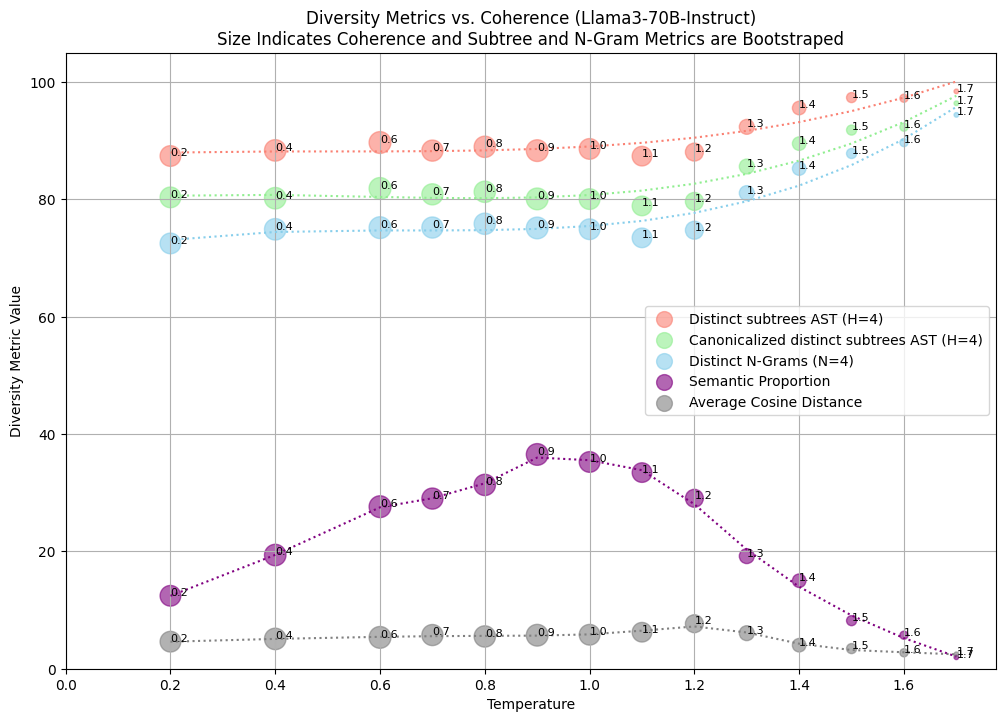

In [5]:
from scipy.stats import linregress
# spline 
from scipy.interpolate import make_interp_spline, BSpline, UnivariateSpline

# Calculate the normalized semantic count
file_path = '/data1/shypula/prog_diversity/all_experiments/Open_Ended_Reevaluation_Cosine_Bootstrap_2024-07-18_00-57-36/driver_stats_2024-07-23_01-44-47.tsv'
data = pd.read_csv(file_path, sep='\t')
data = data[data["template"]=="default"]
data = data[data["model"] == "meta-llama/Meta-Llama-3-70B-Instruct"]
# sort on temperature
data = data.sort_values(by=["temperature"])
# reindex 
data = data.reset_index(drop=True)

# normalize all cols 
# for col in ["all_distinct_4_bootstrap", "all_plain_subtrees_4_bootstrap", "all_stripped_subtrees_4_bootstrap", "all_average_cosine_distance_raw", "coh_semantic_proportion_of_all"]:
#     data[col] = (data[col] - data[col].min()) / (data[col].max() - data[col].min())
#     data[col] = data[col] * 100
data["all_average_cosine_distance_raw"] = data["all_average_cosine_distance_raw"] 
data["heuristic_cosine"] = data["coh_average_cosine_distance_raw"] * (data["all_coherence"] / 100) 
#normalize cosine between 0 and 1 
# data["all_average_cosine_distance_raw"] = (data["all_average_cosine_distance_raw"] - data["all_average_cosine_distance_raw"].min()) / (data["all_average_cosine_distance_raw"].max() - data["all_average_cosine_distance_raw"].min())
# data["all_average_cosine_distance_raw"] = data["all_average_cosine_distance_raw"] * 100
# data["heuristic_cosine"] = (data["heuristic_cosine"] - data["heuristic_cosine"].min()) / (data["heuristic_cosine"].max() - data["heuristic_cosine"].min())
# data["heuristic_cosine"] = data["heuristic_cosine"] * 100

    

bubble_size_coef = 5
s=50


# Prepare the scatter plot
plt.figure(figsize=(12, 8))

# Plot each diversity metric
# plt.scatter(data['coherence'], data['semantic_count_norm'], label='Semantic Count / 30', alpha=0.6)
# plt.scatter(data['coherence'], data['distinct_4'], label='Distinct 4', alpha=0.6)
# plt.scatter(data['coherence'], data['plain_subtrees_4'], label='Plain Subtrees 4', alpha=0.6)
# plt.scatter(data['coherence'], data['stripped_subtrees_4'], label='Stripped Subtrees 4', alpha=0.6)

# plt.scatter(data["semantic_count_norm"], data['coherence'], label='Semantic Count', alpha=0.6)

# ngram_color = 'blue'
# ast_color = 'red'
# # abstracted_ast_color = 'green'

# more pleasant colors
ngram_color = 'skyblue'
ast_color = 'salmon'
abstracted_ast_color = 'lightgreen'
cosine_color = 'gray'
semantic_color = 'purple'

# splines: temperature is X, metric is Y, coherence is dot size 

# ngram
# ngram_spline = make_interp_spline(data['temperature'], data['all_distinct_4_bootstrap'], k=k)
# ast_spline = make_interp_spline(data['temperature'], data['all_plain_subtrees_4_bootstrap'], k=k)
# abstracted_ast_spline = make_interp_spline(data['temperature'], data['all_stripped_subtrees_4_bootstrap'], k=k)
# cosine_spline = make_interp_spline(data['temperature'], data['all_average_cosine_distance_raw'], k=k)
# semantic_spline = make_interp_spline(data['temperature'], data["coh_semantic_proportion_of_all"], k=k)
ngram_spline = UnivariateSpline(data['temperature'], data['all_distinct_4_bootstrap'], s=s)
ast_spline = UnivariateSpline(data['temperature'], data['all_plain_subtrees_4_bootstrap'], s=s)
abstracted_ast_spline = UnivariateSpline(data['temperature'], data['all_stripped_subtrees_4_bootstrap'], s=s)
cosine_spline = UnivariateSpline(data['temperature'], data['all_average_cosine_distance_raw'], s=0.5)
semantic_spline = UnivariateSpline(data['temperature'], data["coh_semantic_proportion_of_all"], s=5)
heuristic_cosine = UnivariateSpline(data['temperature'], data["heuristic_cosine"], s=0.5)




plt.scatter(data['temperature'], data['all_plain_subtrees_4_bootstrap'], label='Distinct subtrees AST (H=4)', alpha=0.6, color=ast_color, s=data["all_coherence"] * bubble_size_coef)
plt.scatter(data['temperature'], data['all_stripped_subtrees_4_bootstrap'], label='Canonicalized distinct subtrees AST (H=4)', alpha=0.6, color=abstracted_ast_color, s=data["all_coherence"] * bubble_size_coef)

plt.scatter(data['temperature'], data['all_distinct_4_bootstrap'], label='Distinct N-Grams (N=4)', alpha=0.6, color=ngram_color, s=data["all_coherence"] * bubble_size_coef)

plt.scatter(data['temperature'], data["coh_semantic_proportion_of_all"], label='Semantic Proportion', alpha=0.6, color=semantic_color, s=data["all_coherence"] * bubble_size_coef)
plt.scatter(data['temperature'], data['all_average_cosine_distance_raw'], label='Average Cosine Distance', alpha=0.6, color=cosine_color, s=data["all_coherence"] * bubble_size_coef)
# plt.scatter(data['temperature'], data["heuristic_cosine"], label='Heuristic Cosine Distance', alpha=0.6, color="black", s=data["all_coherence"] * bubble_size_coef)



# plot the spline dotted 
plt.plot(data['temperature'], ngram_spline(data['temperature']), color=ngram_color, linestyle='dotted')
plt.plot(data['temperature'], ast_spline(data['temperature']), color=ast_color, linestyle='dotted')
plt.plot(data['temperature'], abstracted_ast_spline(data['temperature']), color=abstracted_ast_color, linestyle='dotted')
plt.plot(data['temperature'], cosine_spline(data['temperature']), color=cosine_color, linestyle='dotted')
plt.plot(data['temperature'], semantic_spline(data['temperature']), color=semantic_color, linestyle='dotted')
# plt.plot(data['temperature'], heuristic_cosine(data['temperature']), color="black", linestyle='dotted')




for i, txt in enumerate(data['temperature']):
    plt.annotate(f"{txt}", (data['temperature'][i], data['all_distinct_4_bootstrap'][i]), fontsize=8)
    plt.annotate(f"{txt}", (data['temperature'][i], data['all_plain_subtrees_4_bootstrap'][i]), fontsize=8)
    plt.annotate(f"{txt}", (data['temperature'][i], data['all_stripped_subtrees_4_bootstrap'][i]), fontsize=8)
    plt.annotate(f"{txt}", (data['temperature'][i], data['all_average_cosine_distance_raw'][i]), fontsize=8)
    plt.annotate(f"{txt}", (data['temperature'][i], data["coh_semantic_proportion_of_all"][i]), fontsize=8)
    
    
    
    


# set lower-bound to 0
plt.xlim(left=0)
plt.ylim(bottom=0)

cached_x = plt.xlim()
cached_y = plt.ylim()

# Add titles and labels
plt.title('Diversity Metrics vs. Coherence (Llama3-70B-Instruct)\nSize Indicates Coherence and Subtree and N-Gram Metrics are Bootstraped')
# plt.xlabel('Coherence')
# plt.ylabel('Metric Value')
plt.xlabel('Temperature')
plt.ylabel('Diversity Metric Value')
plt.legend()

# Show the plot
plt.grid(True)
plt.show()

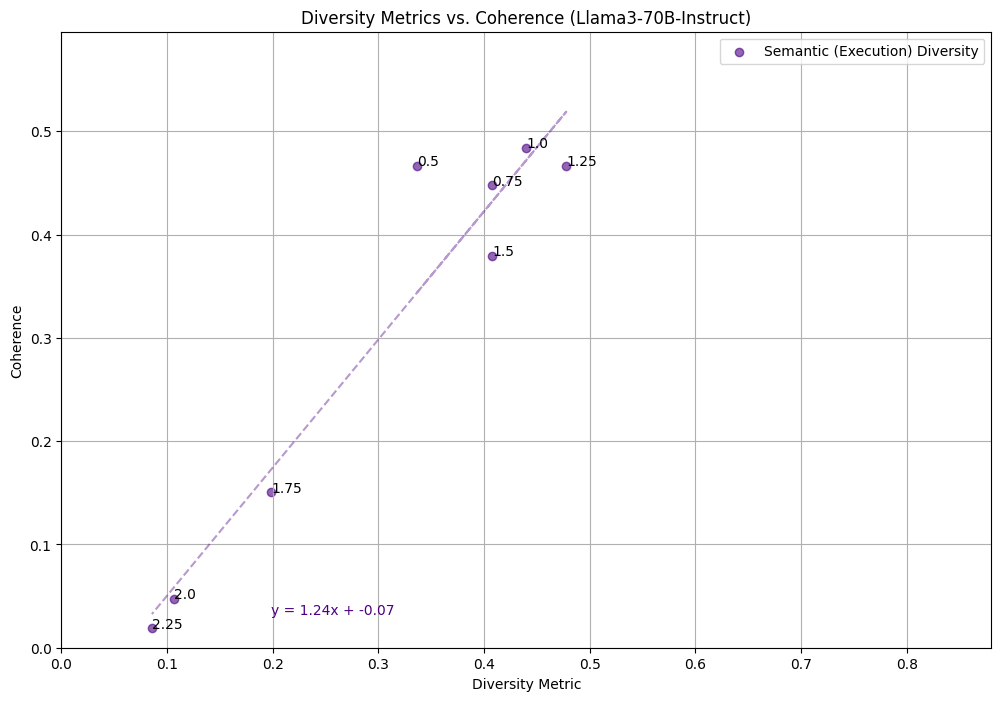

In [32]:
from scipy.stats import linregress

# Calculate the normalized semantic count
data = data[data["model"] == "meta-llama-Meta-Llama-3-70B-Instruct"]
data['semantic_count_norm'] = data['semantic_count'] / 30

# Prepare the scatter plot
plt.figure(figsize=(12, 8))


# more pleasant colors
semantic_count_color = 'indigo'

# # Linear regression
#     slope, intercept, r_value, p_value, std_err = linregress(filtered_data[metric], filtered_data['coherence'])
slope, intercept, r_value, p_value, std_err = linregress(data['semantic_count_norm'], data['coherence'])


plt.scatter(data["semantic_count_norm"], data['coherence'], label='Semantic (Execution) Diversity', alpha=0.6, color=semantic_count_color)

# Plot the linear regression lines
plt.plot(data['semantic_count_norm'], slope * data['semantic_count_norm'] + intercept, color=semantic_count_color, linestyle='dashed', alpha=0.4)

# add a txt label to each linear regression line
plt.text(data['semantic_count_norm'].iloc[-3], slope * data['semantic_count_norm'].iloc[-1] + intercept, f"y = {slope:.2f}x + {intercept:.2f}", color=semantic_count_color, fontsize=10)




# Label points with temperature
# for i, txt in enumerate(data['temperature']):
#     plt.annotate(f"{txt}", (data['coherence'].iat[i], data['semantic_count_norm'].iat[i]))

for i, txt in enumerate(data['temperature']):
    plt.annotate(f"{txt}", (data['semantic_count_norm'].iat[i], data['coherence'].iat[i]))

# Add titles and labels
plt.title('Diversity Metrics vs. Coherence (Llama3-70B-Instruct)')
# plt.xlabel('Coherence')
# plt.ylabel('Metric Value')
plt.xlabel('Diversity Metric')
plt.ylabel('Coherence')
# use cached 
plt.xlim(cached_x)
plt.ylim(cached_y)
plt.legend()

# Show the plot
plt.grid(True)
plt.show()

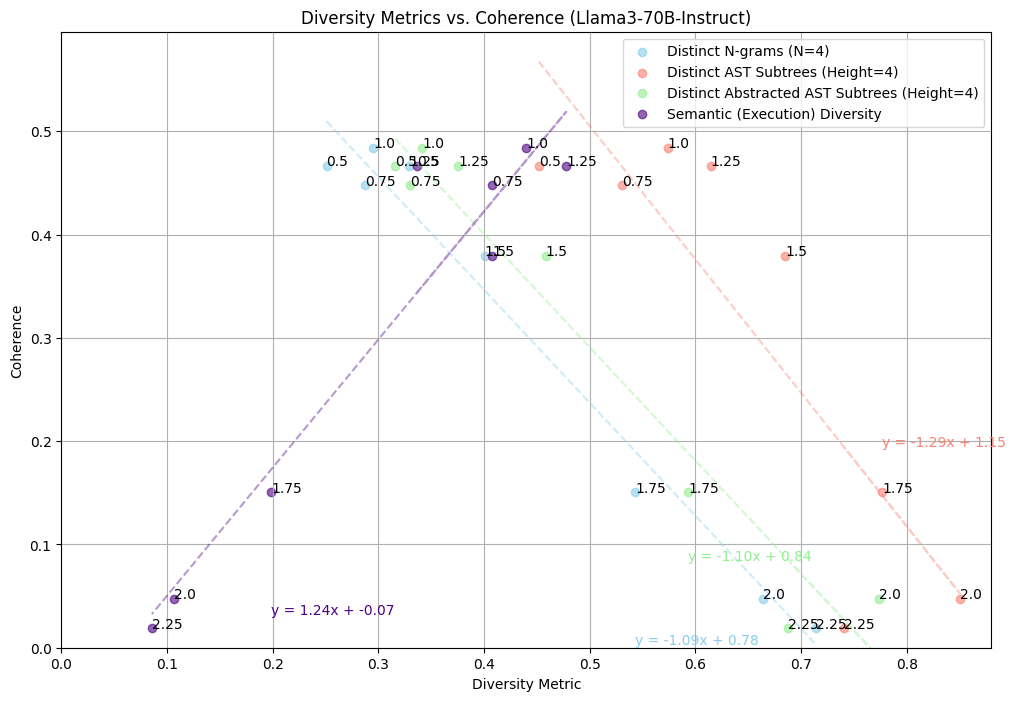

In [33]:
## all in one plot

# Calculate the normalized semantic count

data = data[data["model"] == "meta-llama-Meta-Llama-3-70B-Instruct"]
data['semantic_count_norm'] = data['semantic_count'] / 30

# Prepare the scatter plot
plt.figure(figsize=(12, 8))

# more pleasant colors
ngram_color = 'skyblue'
ast_color = 'salmon'
abstracted_ast_color = 'lightgreen'
semantic_count_color = 'indigo'

# # Linear regression
#     slope, intercept, r_value, p_value, std_err = linregress(filtered_data[metric], filtered_data['coherence'])
ngram_slope, ngram_intercept, ngram_r_value, ngram_p_value, ngram_std_err = linregress(data['distinct_4'], data['coherence'])
ast_slope, ast_intercept, ast_r_value, ast_p_value, ast_std_err = linregress(data['plain_subtrees_4'], data['coherence'])
abstracted_ast_slope, abstracted_ast_intercept, abstracted_ast_r_value, abstracted_ast_p_value, abstracted_ast_std_err = linregress(data['stripped_subtrees_4'], data['coherence'])
semantic_count_slope, semantic_count_intercept, semantic_count_r_value, semantic_count_p_value, semantic_count_std_err = linregress(data['semantic_count_norm'], data['coherence'])

plt.scatter(data['distinct_4'], data['coherence'], label='Distinct N-grams (N=4)', alpha=0.6, color=ngram_color)
plt.scatter(data['plain_subtrees_4'], data['coherence'], label='Distinct AST Subtrees (Height=4)', alpha=0.6, color=ast_color)
plt.scatter(data['stripped_subtrees_4'], data['coherence'], label='Distinct Abstracted AST Subtrees (Height=4)', alpha=0.6, color=abstracted_ast_color)
plt.scatter(data["semantic_count_norm"], data['coherence'], label='Semantic (Execution) Diversity', alpha=0.6, color=semantic_count_color)

# Plot the linear regression lines
plt.plot(data['distinct_4'], ngram_slope * data['distinct_4'] + ngram_intercept, color=ngram_color, linestyle='dashed', alpha=0.4)
plt.plot(data['plain_subtrees_4'], ast_slope * data['plain_subtrees_4'] + ast_intercept, color=ast_color, linestyle='dashed', alpha=0.4)
plt.plot(data['stripped_subtrees_4'], abstracted_ast_slope * data['stripped_subtrees_4'] + abstracted_ast_intercept, color=abstracted_ast_color, linestyle='dashed', alpha=0.4)
plt.plot(data['semantic_count_norm'], semantic_count_slope * data['semantic_count_norm'] + semantic_count_intercept, color=semantic_count_color, linestyle='dashed', alpha=0.4)

# add a txt label to each linear regression line

plt.text(data['distinct_4'].iloc[-3], ngram_slope * data['distinct_4'].iloc[-1] + ngram_intercept, f"y = {ngram_slope:.2f}x + {ngram_intercept:.2f}", color=ngram_color, fontsize=10)
plt.text(data['plain_subtrees_4'].iloc[-3], ast_slope * data['plain_subtrees_4'].iloc[-1] + ast_intercept, f"y = {ast_slope:.2f}x + {ast_intercept:.2f}", color=ast_color, fontsize=10)
plt.text(data['stripped_subtrees_4'].iloc[-3], abstracted_ast_slope * data['stripped_subtrees_4'].iloc[-1] + abstracted_ast_intercept, f"y = {abstracted_ast_slope:.2f}x + {abstracted_ast_intercept:.2f}", color=abstracted_ast_color, fontsize=10)
plt.text(data['semantic_count_norm'].iloc[-3], semantic_count_slope * data['semantic_count_norm'].iloc[-1] + semantic_count_intercept, f"y = {semantic_count_slope:.2f}x + {semantic_count_intercept:.2f}", color=semantic_count_color, fontsize=10)


# Label points with temperature
# for i, txt in enumerate(data['temperature']):
#     plt.annotate(f"{txt}", (data['coherence'].iat[i], data['semantic_count_norm'].iat[i]))

for i, txt in enumerate(data['temperature']):
    plt.annotate(f"{txt}", (data['distinct_4'].iat[i], data['coherence'].iat[i]))
    plt.annotate(f"{txt}", (data['plain_subtrees_4'].iat[i], data['coherence'].iat[i]))
    plt.annotate(f"{txt}", (data['stripped_subtrees_4'].iat[i], data['coherence'].iat[i]))
    plt.annotate(f"{txt}", (data['semantic_count_norm'].iat[i], data['coherence'].iat[i]))
    
    
# Add titles and labels
plt.title('Diversity Metrics vs. Coherence (Llama3-70B-Instruct)')
# plt.xlabel('Coherence')
# plt.ylabel('Metric Value')
plt.xlabel('Diversity Metric')
plt.ylabel('Coherence')
plt.legend()

plt.xlim(cached_x)
plt.ylim(cached_y)

# Show the plot
plt.grid(True)
plt.show()


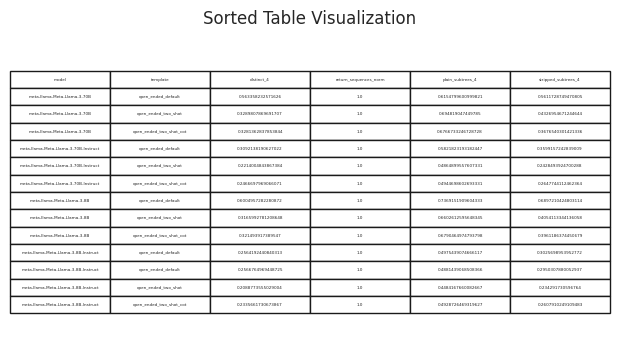

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Path to the TSV file
file_path = '/data1/shypula/prog_diversity/open_ended/2024-06-10_23-49-06_driver_stats.tsv'

# Load the TSV file
data = pd.read_csv(file_path, sep='\t')
data = data[data["temperature"] == 1.0]
data = data[data["top_p"] == 1.0]

# Select and calculate necessary columns
data['return_sequences_norm'] = data['num_return_sequences'] / 30
selected_columns = ['model', 'template', 'distinct_4', 'return_sequences_norm', 'plain_subtrees_4', 'stripped_subtrees_4']

# Filter data to include only the necessary columns
filtered_data = data[selected_columns]

# Sort the data by 'model' and then 'template'
sorted_data = filtered_data.sort_values(by=['model', 'template'])

# Create a figure and an axis to host the table
fig, ax = plt.subplots(figsize=(10, 4))  # You may need to adjust the size
ax.set_title('Sorted Table Visualization')  # Optional: set a title for the table

# Use seaborn's color palette for aesthetics
sns.set_theme(style="whitegrid")

# Create the table inside the plot
the_table = plt.table(cellText=sorted_data.values, colLabels=sorted_data.columns, loc='center', cellLoc='center')

# Hide axes
ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)
ax.set_frame_on(False)

# Adjust layout to fit the table
plt.subplots_adjust(left=0.2, right=0.8, top=0.9, bottom=0.1)
# increase dpi 
plt.savefig('/home/shypula/program_cal_diverse/plots/formatted_table.png', dpi=300)

# # Save the figure
# plt.savefig('/mnt/data/formatted_table.png')

# Optionally display the figure if running interactively
plt.show()


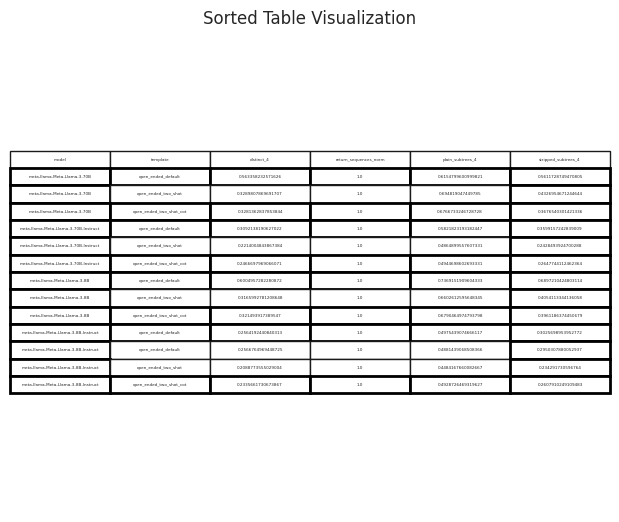

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Path to the TSV file
file_path = '/data1/shypula/prog_diversity/open_ended/2024-06-10_23-49-06_driver_stats.tsv'

# Load the TSV file
data = pd.read_csv(file_path, sep='\t')
data = data[data["temperature"] == 1.0]
data = data[data["top_p"] == 1.0]

# Select and calculate necessary columns
data['semantic_count_norm'] = data['semantic_count'] / 30
selected_columns = ['model', 'template', 'distinct_4', 'return_sequences_norm', 'plain_subtrees_4', 'stripped_subtrees_4']

# Filter data to include only the necessary columns
filtered_data = data[selected_columns]

# Sort the data by 'model' and then 'template'
sorted_data = filtered_data.sort_values(by=['model', 'template'])

# Create a figure and an axis to host the table
fig, ax = plt.subplots(figsize=(10, 6))  # Adjust the size as needed
ax.set_title('Sorted Table Visualization')  # Optional: set a title for the table

# Use seaborn's color palette for aesthetics
sns.set_theme(style="whitegrid")

# Create the table and save the object for further manipulation
the_table = plt.table(cellText=sorted_data.values, colLabels=sorted_data.columns, loc='center', cellLoc='center')

# Track start and end of each group
last_model = None
group_start = 1
for row in range(1, len(sorted_data) + 2):  # +2 to handle the last group
    if row <= len(sorted_data):
        model = sorted_data.iloc[row-1, 0]
    if row == len(sorted_data) + 1 or model != last_model:
        if last_model is not None:
            # Apply bounding box to the previous group
            for r in range(group_start, row):
                for c in range(len(sorted_data.columns)):
                    cell = the_table.get_celld()[(r, c)]
                    # Apply only to the outer borders of the group
                    if r == group_start:  # Top border
                        cell.set_edgecolor('black')
                        cell.set_linewidth(2)
                    if r == row - 1:  # Bottom border
                        cell.set_edgecolor('black')
                        cell.set_linewidth(2)
                    if c == 0:  # Left border
                        cell.set_edgecolor('black')
                        cell.set_linewidth(2)
                    if c == len(sorted_data.columns) - 1:  # Right border
                        cell.set_edgecolor('black')
                        cell.set_linewidth(2)
        group_start = row
        last_model = model

# Hide axes
ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)
ax.set_frame_on(False)

# Adjust layout to fit the table
plt.subplots_adjust(left=0.2, right=0.8, top=0.9, bottom=0.1)

# Save the figure
plt.savefig('/home/shypula/program_cal_diverse/plots/formatted_table.png', dpi=300)

# Optionally display the figure if running interactively
plt.show()


In [48]:
file_path = '/data1/shypula/prog_diversity/open_ended/2024-06-10_23-49-06_driver_stats.tsv'

# Load the TSV file
data = pd.read_csv(file_path, sep='\t')
data = data[data["temperature"] == 1.0]
data = data[data["top_p"] == 1.0]

# Select and calculate necessary columns
data['semantic_count_norm'] = data['semantic_count'] / 30
selected_columns = ['model', 'template', 'coherence', 'semantic_count_norm','distinct_4',  'plain_subtrees_4', 'stripped_subtrees_4']
# truncate precision to .2f
sorted_data = data[selected_columns].sort_values(by=['model', 'template']).round(4)
# multiple by 100 to get percentage
sorted_data['coherence'] = sorted_data['coherence'] * 100
sorted_data['semantic_count_norm'] = sorted_data['semantic_count_norm'] * 100
sorted_data['distinct_4'] = sorted_data['distinct_4'] * 100
sorted_data['plain_subtrees_4'] = sorted_data['plain_subtrees_4'] * 100
sorted_data['stripped_subtrees_4'] = sorted_data['stripped_subtrees_4'] * 100

sorted_data

,model,template,coherence,semantic_count_norm,distinct_4,plain_subtrees_4,stripped_subtrees_4
6,meta-llama-Meta-Llama-3-70B,open_ended_default,5.24,8.41,56.34,61.55,56.12
7,meta-llama-Meta-Llama-3-70B,open_ended_two_shot,18.10,23.02,32.90,69.48,43.27
8,meta-llama-Meta-Llama-3-70B,open_ended_two_shot_cot,24.60,26.51,32.81,67.67,36.77
9,meta-llama-Meta-Llama-3-70B-Instruct,open_ended_default,46.19,44.60,30.92,58.22,35.99
10,meta-llama-Meta-Llama-3-70B-Instruct,open_ended_two_shot,30.63,33.97,22.14,48.65,24.28
11,meta-llama-Meta-Llama-3-70B-Instruct,open_ended_two_shot_cot,43.02,41.27,24.67,49.45,26.48
0,meta-llama-Meta-Llama-3-8B,open_ended_default,4.60,7.30,60.05,73.69,68.97
1,meta-llama-Meta-Llama-3-8B,open_ended_two_shot,20.79,22.06,31.66,66.03,40.54
2,meta-llama-Meta-Llama-3-8B,open_ended_two_shot_cot,19.52,24.13,32.15,67.90,39.61
3,meta-llama-Meta-Llama-3-8B-Instruct,open_ended_default,59.37,60.63,25.64,49.75,30.26
